# Tahap 1: Import & Eksplorasi Dataset Batik

Notebook ini bertujuan untuk melakukan persiapan dan analisis awal pada "Dataset Batik Indonesia" dari Kaggle.

**Langkah-langkah:**
1.  **install numpy di terminal (.venv)**: pip install numpy pandas matplotlib seaborn pillow
2.  **Setup Environment**: Menginstal dan mengimpor library yang dibutuhkan.
3.  **Memuat dataset ke dalam project**: Memasukan file dataset ke dalam directory project
4.  **Eksplorasi Awal**: Memeriksa struktur folder, jumlah kelas, dan nama-nama motif.
5.  **Analisis Distribusi Data**: Menghitung dan memvisualisasikan jumlah gambar per kelas untuk mendeteksi ketidakseimbangan.
6.  **Analisis ukuran gambar** : Mencari rata-rata , minimum, dan maksum size gambar
7.  **Visualisasi Sampel Data**: Menampilkan beberapa contoh gambar dari setiap kelas beserta ukurannya.

In [ ]:
# 2.Setup Environment 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

%matplotlib inline
sns.set_style('darkgrid')

print("✅ Semua library berhasil diimport!")


✅ Semua library berhasil diimport!


In [ ]:
#3. Tentukan path utama ke folder dataset yang sudah diekstrak
base_dir = 'dataset/dataset_batik_fix/processed_dataset/train'

# Cek apakah direktori ada untuk memastikan path sudah benar
if os.path.exists(base_dir):
    print(f"✅ Dataset ditemukan di path: {base_dir}")
else:
    print(f"❌ ERROR: Dataset tidak ditemukan di path: {base_dir}")
    print("Pastikan Anda sudah menempatkan folder 'Dataset Batik' sesuai struktur yang diinstruksikan.")

✅ Dataset ditemukan di path: dataset/dataset_batik_fix/processed_dataset/train


In [ ]:
# 4 Eksplorasi Awal
# Dapatkan daftar nama motif (nama folder) dari path yang sudah didefinisikan
if os.path.exists(base_dir):
    class_names = sorted(os.listdir(base_dir))
    num_classes = len(class_names)

    print(f"Jumlah total motif (kelas): {num_classes}")
    print("\nDaftar Motif:")
    for name in class_names:
        print(f"- {name}")
else:
    print("Path direktori belum benar. Silakan perbaiki pada Sel 3.")

Jumlah total motif (kelas): 20

Daftar Motif:
- batik_betawi
- batik_bokor_kencono
- batik_buketan
- batik_dayak
- batik_jlamprang
- batik_kawung
- batik_liong
- batik_mega_mendung
- batik_parang
- batik_sekarjagad
- batik_sidoluhur
- batik_sidomukti
- batik_sidomulyo
- batik_singa_barong
- batik_srikaton
- batik_tribusono
- batik_tujuh_rupa
- batik_tuntrum
- batik_wahyu_tumurun
- batik_wirasat


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10904\92229797.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Jumlah Gambar', y='Motif', data=df_dist, palette='viridis', orient='h')


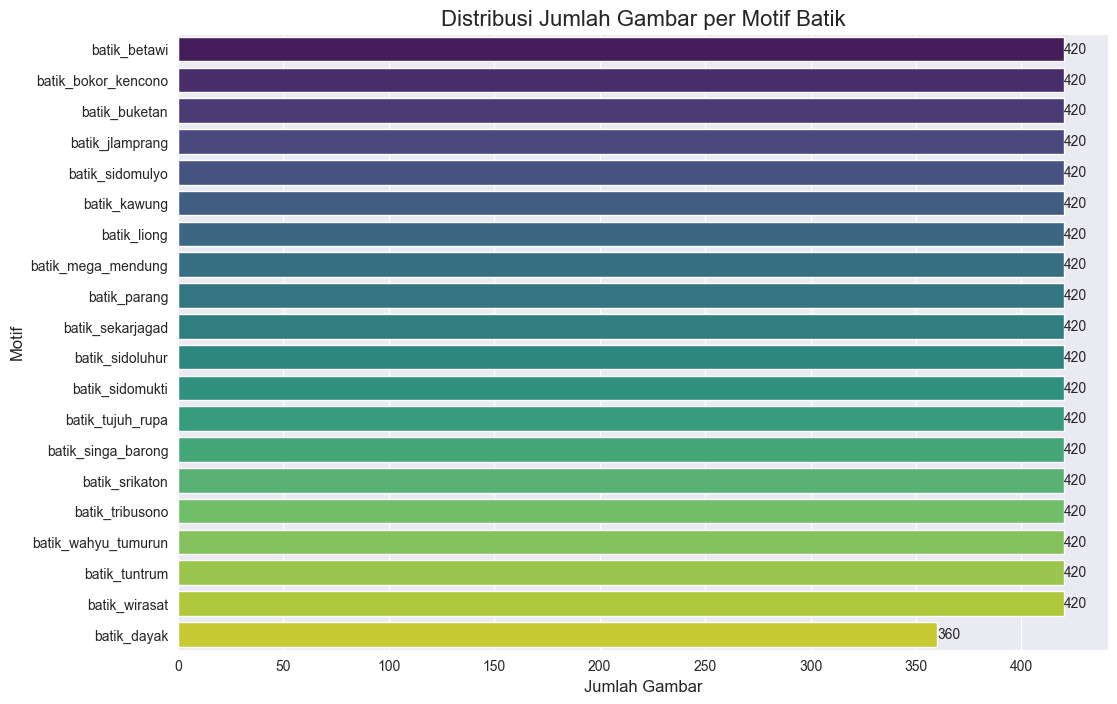


Detail Jumlah Gambar per Motif:
                  Motif  Jumlah Gambar
0          batik_betawi            420
1   batik_bokor_kencono            420
2         batik_buketan            420
4       batik_jlamprang            420
12      batik_sidomulyo            420
5          batik_kawung            420
6           batik_liong            420
7    batik_mega_mendung            420
8          batik_parang            420
9      batik_sekarjagad            420
10      batik_sidoluhur            420
11      batik_sidomukti            420
16     batik_tujuh_rupa            420
13   batik_singa_barong            420
14       batik_srikaton            420
15      batik_tribusono            420
18  batik_wahyu_tumurun            420
17        batik_tuntrum            420
19        batik_wirasat            420
3           batik_dayak            360


In [ ]:
#5. Menghitung jumlah gambar di setiap kelas
class_distribution = {}
if os.path.exists(base_dir):
    for motif in class_names:
        motif_path = os.path.join(base_dir, motif)
        # Pastikan kita hanya menghitung file, bukan sub-direktori jika ada
        num_images = len([name for name in os.listdir(motif_path) if os.path.isfile(os.path.join(motif_path, name))])
        class_distribution[motif] = num_images

    # Ubah ke DataFrame untuk visualisasi
    df_dist = pd.DataFrame(list(class_distribution.items()), columns=['Motif', 'Jumlah Gambar']).sort_values('Jumlah Gambar', ascending=False)

    # Visualisasi distribusi kelas
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Jumlah Gambar', y='Motif', data=df_dist, palette='viridis', orient='h')
    plt.title('Distribusi Jumlah Data/Gambar per Motif Batik', fontsize=16)
    plt.xlabel('Jumlah Gambar', fontsize=12)
    plt.ylabel('Motif', fontsize=12)

    # Menambahkan label angka pada bar
    for i in ax.containers:
        ax.bar_label(i,)

    plt.show()

    # Tampilkan data frame
    print("\nDetail Jumlah Gambar per Motif:")
    print(df_dist)
else:
    print("Path direktori belum benar. Silakan perbaiki pada Sel 3.")

In [25]:
# 6. Analisis ukuran gambar
import statistics

image_sizes = []
for motif in class_names:
    motif_path = os.path.join(base_dir, motif)
    files = [f for f in os.listdir(motif_path) if os.path.isfile(os.path.join(motif_path, f))]
    for file in files[:10]:  # ambil sampel 10 gambar per kelas agar cepat
        img_path = os.path.join(motif_path, file)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)

# Hitung statistik ukuran
widths, heights = zip(*image_sizes)
print(f"Rata-rata ukuran gambar: {int(statistics.mean(widths))}x{int(statistics.mean(heights))} px")
print(f"Ukuran minimum: {min(widths)}x{min(heights)} px")
print(f"Ukuran maksimum: {max(widths)}x{max(heights)} px")


Rata-rata ukuran gambar: 224x224 px
Ukuran minimum: 224x224 px
Ukuran maksimum: 224x224 px


Ditemukan 20 kelas.


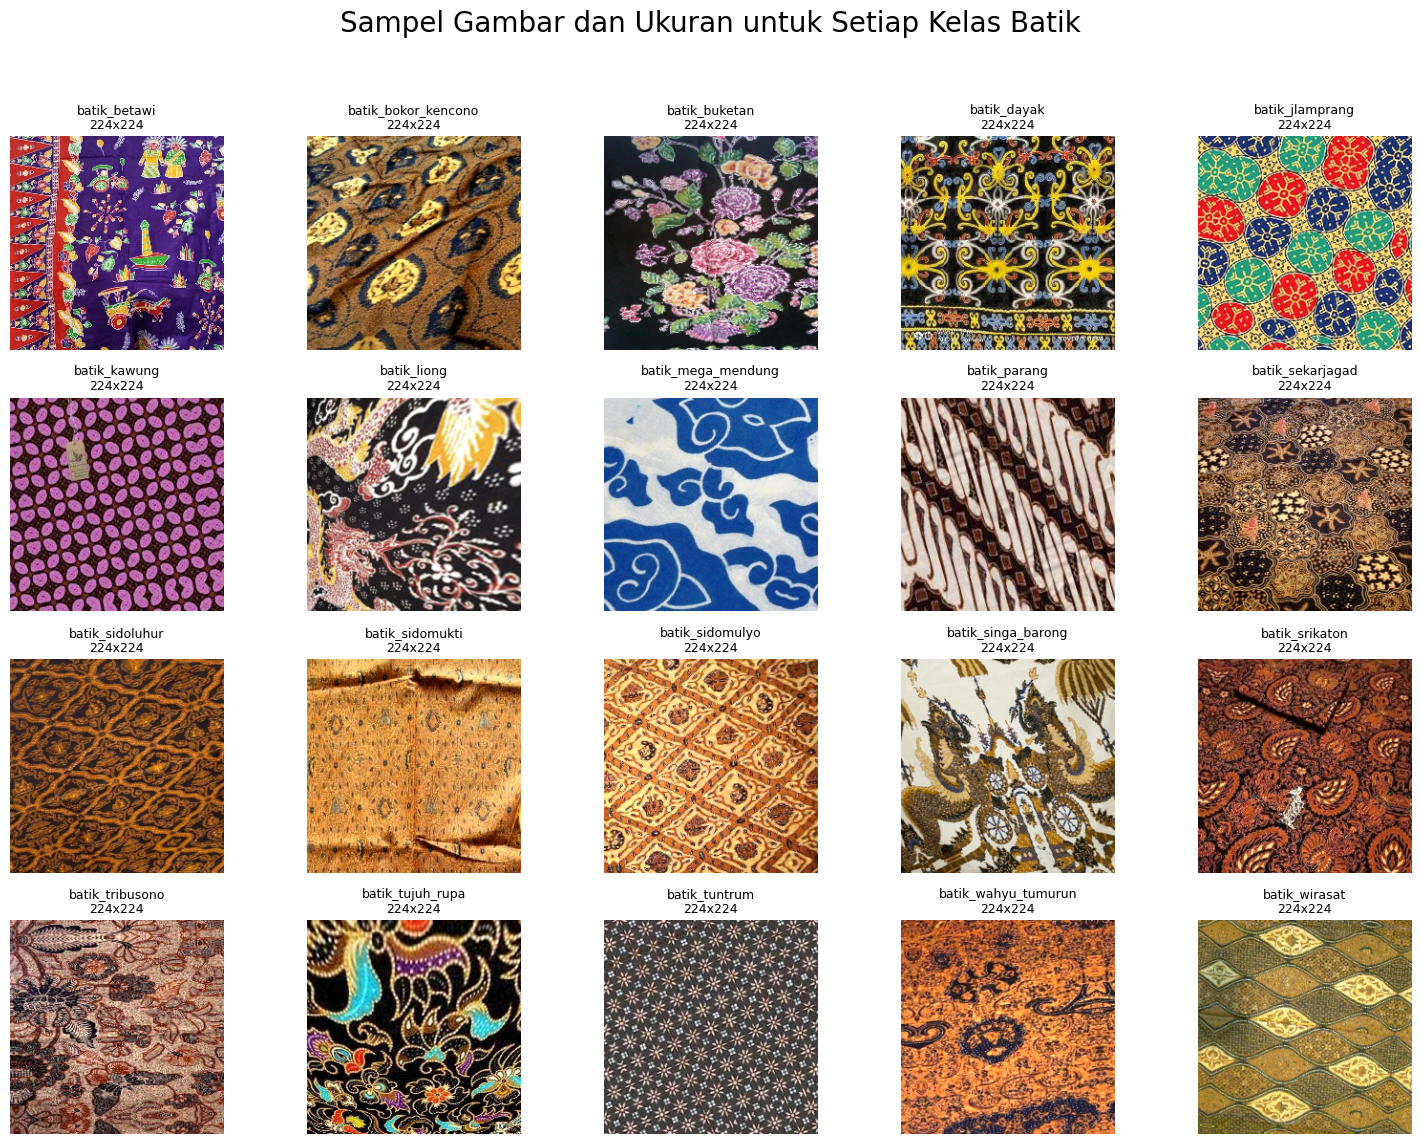

In [9]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Asumsikan 'base_dir' sudah ada dari sel sebelumnya
base_dir = 'dataset/dataset_batik_fix/processed_dataset/train'

# --- TAMBAHKAN BARIS INI ---
# Membuat daftar nama kelas dari nama folder di dalam base_dir
class_names = sorted(os.listdir(base_dir))
print(f"Ditemukan {len(class_names)} kelas.")


# Kode Anda untuk menampilkan gambar (sekarang akan berfungsi)
plt.figure(figsize=(15, 12)) 

# Loop melalui SEMUA kelas di 'class_names'
for i, motif in enumerate(class_names):
    motif_path = os.path.join(base_dir, motif)
    files = [f for f in os.listdir(motif_path) if os.path.isfile(os.path.join(motif_path, f))]
    
    if files:
        img_path = os.path.join(motif_path, random.choice(files))
        img = Image.open(img_path)
        width, height = img.size
        
        plt.subplot(4, 5, i + 1)
        plt.imshow(img)
        plt.title(f"{motif}\n{width}x{height}", fontsize=9)
        plt.axis('off')

plt.suptitle("Sampel Gambar dan Ukuran untuk Setiap Kelas Batik", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()